# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [48]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [49]:
image = imread(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\Machine_Learning\2-No_Supervisado\3-Clustering\Captura.JPG")
image

array([[[ 60,  88, 127],
        [ 60,  88, 127],
        [ 60,  88, 128],
        ...,
        [ 48,  72,  96],
        [ 44,  69,  91],
        [ 42,  67,  89]],

       [[ 65,  93, 133],
        [ 64,  93, 133],
        [ 66,  94, 134],
        ...,
        [ 49,  73,  97],
        [ 46,  71,  93],
        [ 44,  69,  91]],

       [[ 71, 100, 142],
        [ 69, 101, 142],
        [ 72, 101, 143],
        ...,
        [ 51,  75,  99],
        [ 49,  74,  96],
        [ 48,  73,  95]],

       ...,

       [[161, 189, 236],
        [160, 188, 235],
        [157, 185, 232],
        ...,
        [101, 103, 126],
        [100, 102, 125],
        [ 95,  97, 120]],

       [[163, 191, 238],
        [162, 190, 237],
        [159, 187, 234],
        ...,
        [ 76,  78,  99],
        [ 74,  76,  97],
        [ 68,  70,  91]],

       [[164, 192, 239],
        [163, 191, 238],
        [161, 189, 236],
        ...,
        [ 56,  57,  77],
        [ 61,  62,  82],
        [ 63,  64,  84]]

Analizala

Muestra la imagen para ver que se ha cargado bien

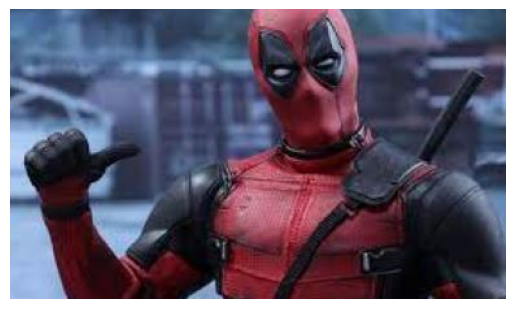

In [50]:
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [68]:
image.shape

(223, 382, 3)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [51]:
import numpy as np

# Supongamos que tienes una imagen llamada 'image' con forma (alto, ancho, color)
alto, ancho, color = image.shape

# Reshape de la imagen
image_reshape = image.reshape(alto * ancho, color)

# Verificar la nueva forma
print("Nueva forma de la imagen:", image_reshape.shape)


Nueva forma de la imagen: (85186, 3)


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

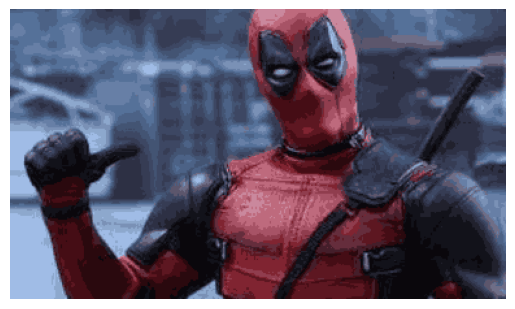

In [60]:
# Supongamos que tienes la imagen comprimida llamada 'image_compressed'

# Normalizar los valores de píxel en el rango [0, 1]
image_compressed = image_compressed.astype(np.uint8)


# Mostrar la imagen comprimida
plt.imshow(image_compressed)
plt.axis('off')
plt.show()


In [61]:
from sklearn.cluster import KMeans

k=25

# Crear una instancia de K-means con 'k' clusters
kmeans = KMeans(n_clusters=k)

# Ajustar K-means en los datos
kmeans.fit(image_reshape)

# Obtener las etiquetas de los clusters asignados a cada observación
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Asignar a cada observación el color del centroide más cercano
image_compressed = centroids[labels]

# Reshape de la imagen comprimida a la forma original
image_compressed = image_compressed.reshape(alto, ancho, color)



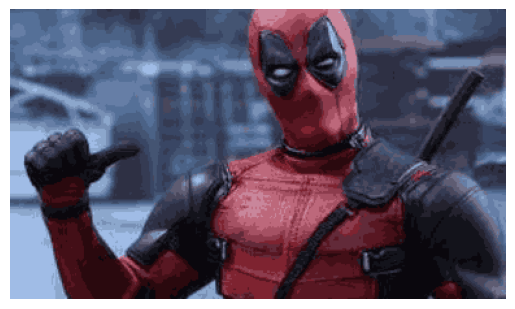

In [64]:
image_compressed = image_compressed.astype(np.uint8)
plt.imshow(image_compressed) 
plt.axis('off')
plt.show()




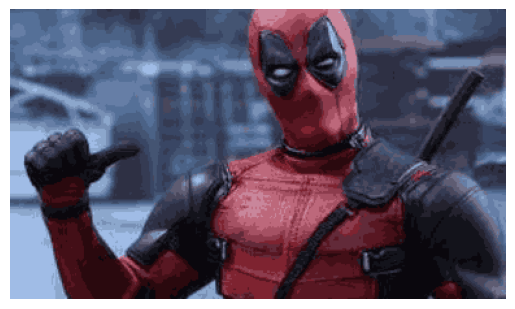

In [65]:
# Supongamos que tienes la imagen comprimida llamada 'image_compressed'

# Asegurarse de que los valores de píxel estén en el rango [0, 255]
image_compressed = np.clip(image_compressed, 0, 255)

# Convertir los valores de píxel al tipo de dato entero uint8
image_compressed = image_compressed.astype(np.uint8)

# Mostrar la imagen comprimida
plt.imshow(image_compressed)
plt.axis('off')
plt.show()



#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [66]:
# Supongamos que has ajustado el modelo K-means y tienes los atributos cluster_centers_ y labels_

# Crear una nueva imagen comprimida utilizando los centroides
image_compressed = kmeans.cluster_centers_[labels]

# Reshape de la imagen comprimida a la forma original
image_compressed = image_compressed.reshape(alto, ancho, color)

# Mostrar la imagen comprimida




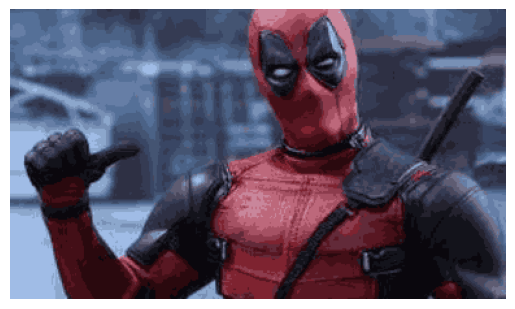

In [67]:
image_compressed = image_compressed.astype(np.uint8)


plt.imshow(image_compressed)
plt.axis('off')
plt.show()

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

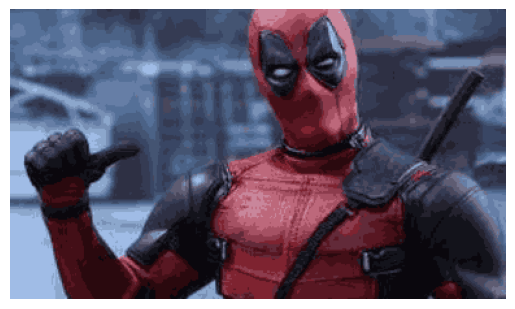

In [69]:
# Restaurar la forma original de la imagen
image_restored = image_compressed.reshape(223, 382, 3)

# Mostrar la imagen restaurada
plt.imshow(image_restored)
plt.axis('off')
plt.show()


#### 7. Imprime y guarda en tu ordenador la imagen resultante

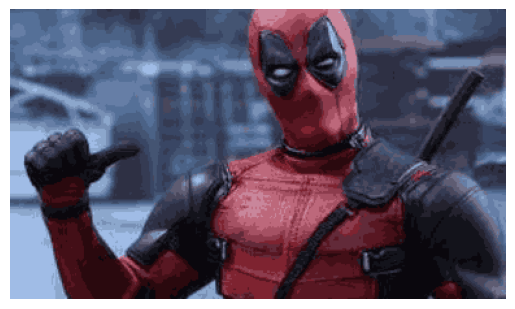

NameError: name 'cv2' is not defined

In [72]:
# Mostrar la imagen restaurada
plt.imshow(image_restored)
plt.axis('off')
plt.show()

# Guardar la imagen resultante en tu ordenador


In [74]:
import cv2
cv2.imwrite(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\Machine_Learning\2-No_Supervisado\3-Clustering\modificada.jpg", image_restored)


True

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [78]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def comprimir_imagen(imagen, num_colores, guardar=False, nombre_archivo=None):
    # Obtener la forma original de la imagen
    alto, ancho, _ = imagen.shape

    # Reshape de la imagen a un vector de forma (número de píxeles, 3)
    imagen_reshape = imagen.reshape(-1, 3)

    # Crear una instancia de K-means con 'num_colores' clusters
    kmeans = KMeans(n_clusters=num_colores, random_state=42)

    # Ajustar K-means a los datos
    kmeans.fit(imagen_reshape)

    # Obtener las etiquetas de los clusters asignados a cada píxel
    etiquetas = kmeans.labels_

    # Obtener los centroides de los clusters
    centroides = kmeans.cluster_centers_

    # Asignar a cada píxel el color del centroide más cercano
    imagen_comprimida = centroides[etiquetas]

    # Reshape de la imagen comprimida a la forma original
    imagen_comprimida = imagen_comprimida.reshape(alto, ancho, 3)

    # Mostrar o guardar la imagen según la opción seleccionada
    if guardar:
        if nombre_archivo is None:
            nombre_archivo = "imagen_comprimida.jpg"
        cv2.imwrite(nombre_archivo, imagen_comprimida)
    else:
        plt.imshow(cv2.cvtColor(imagen_comprimida, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


In [79]:
# Cargar la imagen
imagen = cv2.imread("ruta_de_la_imagen.jpg")

# Comprimir la imagen con 10 colores y mostrarla por pantalla
comprimir_imagen(imagen, num_colores=10)



AttributeError: 'NoneType' object has no attribute 'shape'

In [80]:
comprimir_imagen(imagen, num_colores=5, guardar=True, nombre_archivo="imagen_comprimida.jpg")


AttributeError: 'NoneType' object has no attribute 'shape'